Riya P Dhanduke  
Assignment Lab 10  
Introduction to Data Science  
Instructor Name: Narges D Bary  

### 1. Introduction  
a. Context  
This dataset contains information about sneakers from various brands (primarily Adidas and Nike),
including pricing, ratings, and review information. The data appears to be from an e-commerce 
platform and includes both discounted and full-price products.  

b. Objectives:
- Perform exploratory data analysis on the sneakers dataset
- Identify patterns in pricing, discounts, and customer ratings
- Answer specific data mining questions about the dataset
- Provide insights for business decision-making  

c. Data Description:
- Product Name: Name/description of the sneaker product
- Product ID: Unique identifier for each product
- Listing Price: Original price of the product (in local currency)
- Sale Price: Discounted/actual selling price
- Discount: Percentage discount offered
- Brand: Manufacturer brand (Adidas, Nike)
- Rating: Customer rating (0-5 scale)
- Reviews: Number of customer reviews

### 2. Importing Libraries

In [4]:
#import necessary libraries
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

### 3. Loading dataset   
a. Creating a copy of the dataset

In [3]:
df = pd.read_csv("sneakers.csv")
df_copy = df.copy()
df_copy.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72


**Observation**
- The dataset contains multiple columns such as Product Name, Product ID, Listing Price, Sale Price, Discount, Brand, Rating, and Reviews.

- Each record corresponds to a specific Adidas product, including its pricing, brand category, and customer feedback.

- Prices and discounts vary across products, indicating diverse pricing strategies.

### 4. Performing EDA(Exploratory Data Analysis)   
#### a. Basic Data Exploration  
i. Checking data attributes (shape, size, dimensionality, data types, column names)

In [5]:
print("\n1. Dataset Shape:")
print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}")

print("\n2. Dataset Size (total elements):")
print(f"   {df.size}")

print("\n3. Dataset Dimensionality:")
print(f"   {df.ndim} dimensions")

print("\n4. Data Types:")
print(df.dtypes)

print("\n5. Column Names:")
print(df.columns.tolist())


1. Dataset Shape:
   Rows: 3268, Columns: 8

2. Dataset Size (total elements):
   26144

3. Dataset Dimensionality:
   2 dimensions

4. Data Types:
Product Name      object
Product ID        object
Listing Price      int64
Sale Price         int64
Discount           int64
Brand             object
Rating           float64
Reviews            int64
dtype: object

5. Column Names:
['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Discount', 'Brand', 'Rating', 'Reviews']


**Observation** 
- The dataset has 3,268 rows and 8 columns.

- All columns are properly recognized with correct data types (numerical or categorical).

ii. Getting Data information

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268 entries, 0 to 3267
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Product Name   3268 non-null   object 
 1   Product ID     3268 non-null   object 
 2   Listing Price  3268 non-null   int64  
 3   Sale Price     3268 non-null   int64  
 4   Discount       3268 non-null   int64  
 5   Brand          3268 non-null   object 
 6   Rating         3268 non-null   float64
 7   Reviews        3268 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 204.4+ KB


**Observations**
- Confirms the presence of 3,268 non-null entries across all columns.

- Columns include both numeric and object types — suitable for mixed statistical and categorical analysis.

- The dataset uses around 204 KB of memory, indicating a medium-sized dataset.

iii. Examining the data statistical summary

In [7]:
df.describe()

,Listing Price,Sale Price,Discount,Rating,Reviews
count,3268.000000,3268.000000,3268.000000,3268.000000,3268.000000
mean,6868.020196,6134.265606,26.875765,3.242105,40.551714
std,4724.659386,4293.247581,22.633487,1.428856,31.543491
min,0.000000,449.000000,0.000000,0.000000,0.000000
25%,4299.000000,2999.000000,0.000000,2.600000,10.000000
50%,5999.000000,4799.000000,40.000000,3.500000,37.000000
75%,8999.000000,7995.000000,50.000000,4.400000,68.000000
max,29999.000000,36500.000000,60.000000,5.000000,223.000000


- Average listing price: ₹6,868, while the average sale price is ₹6,134, implying an average discount of around 27%.

- Ratings average around 3.24, showing moderate customer satisfaction.

- The number of reviews per product varies widely, with a maximum of 223 reviews, suggesting a few highly popular items.

iv. Getting a Summary of categorical variables

In [8]:
print("\nBrand Value Counts:")
print(df['Brand'].value_counts())


Brand Value Counts:
Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64


**Observation** Brand distribution reveals Adidas sub-brands dominate the dataset, followed by Nike. 

v. Checking on missing values

In [9]:
df.isnull().sum()

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

**Observation** We can conclude that there are not missing values in the dataset for any of the column

vi. Examining outliers

In [10]:
numerical_cols = ['Listing Price', 'Sale Price', 'Discount', 'Rating', 'Reviews']

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col}:")
    print(f"   Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
    print(f"   Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"   Number of outliers: {len(outliers)}")


Listing Price:
   Q1: 4299.0, Q3: 8999.0, IQR: 4700.0
   Lower Bound: -2751.0, Upper Bound: 16049.0
   Number of outliers: 132

Sale Price:
   Q1: 2999.0, Q3: 7995.0, IQR: 4996.0
   Lower Bound: -4495.0, Upper Bound: 15489.0
   Number of outliers: 141

Discount:
   Q1: 0.0, Q3: 50.0, IQR: 50.0
   Lower Bound: -75.0, Upper Bound: 125.0
   Number of outliers: 0

Rating:
   Q1: 2.6, Q3: 4.4, IQR: 1.8000000000000003
   Lower Bound: -0.10000000000000009, Upper Bound: 7.1000000000000005
   Number of outliers: 0

Reviews:
   Q1: 10.0, Q3: 68.0, IQR: 58.0
   Lower Bound: -77.0, Upper Bound: 155.0
   Number of outliers: 1


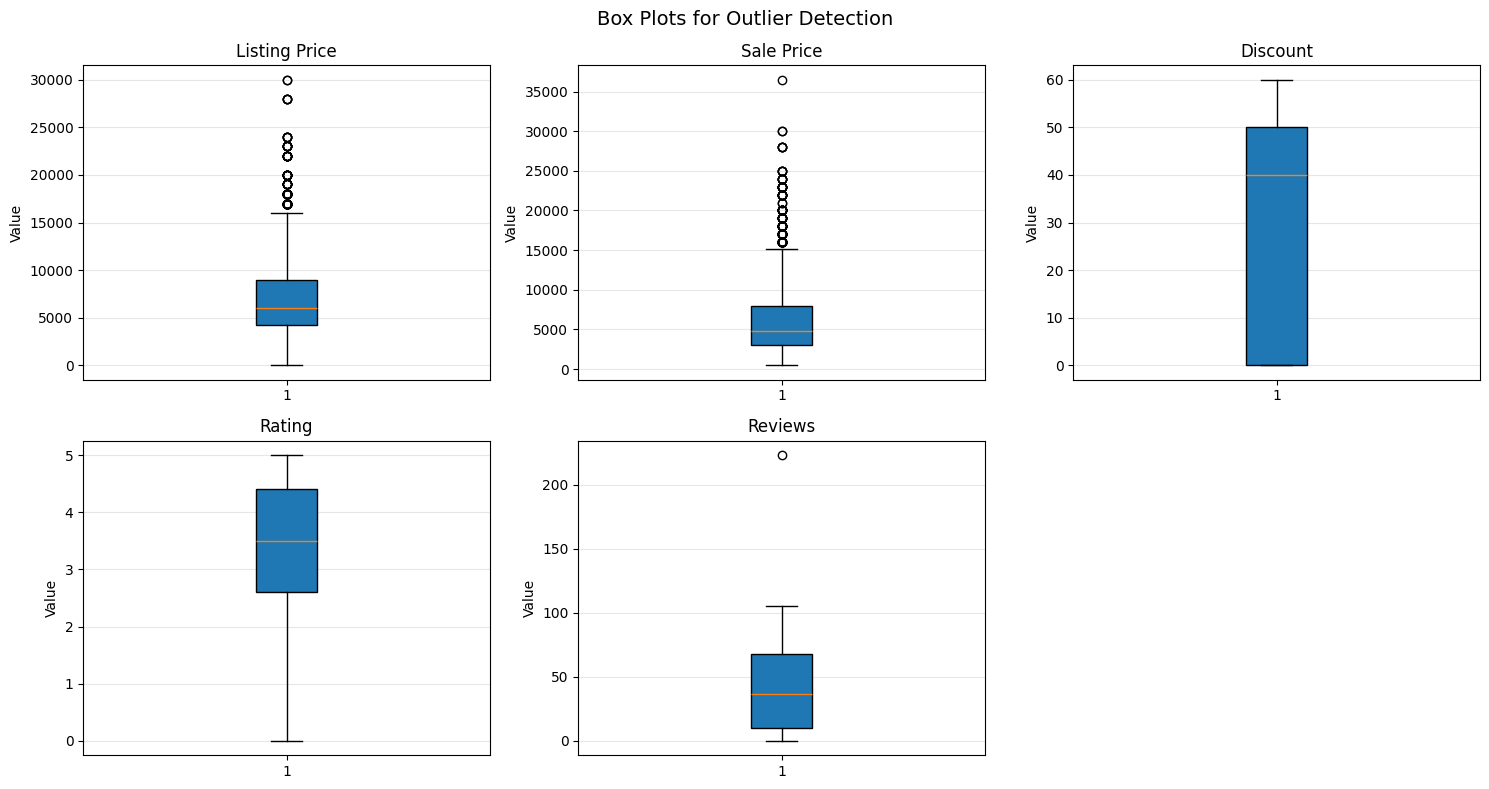

In [36]:
# Create box plots for outlier visualization
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
fig.suptitle('Box Plots for Outlier Detection', fontsize=14)
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    axes[idx].boxplot(df[col], patch_artist=True)
    axes[idx].set_title(col)
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

fig.delaxes(axes[5])
plt.tight_layout()
plt.show()

**Observation**

Significant outliers are present in **Listing Price (132)** and **Sale Price (141)**, indicating a few items priced much higher than the typical range. **Discount**, **Rating**, and **Reviews** show minimal to no outliers, suggesting consistent and stable data distributions for these variables.

#### b. Data wrangling  
i. Cleaning data

In [37]:
# Check for duplicates
print(f"\nDuplicates found: {df.duplicated().sum()}")

# Remove duplicates
df_clean = df.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape[0]} rows")


Duplicates found: 88
After removing duplicates: 3180 rows


In [38]:
# Check for whitespace in string columns
print("\nChecking for whitespace issues...")
for col in df_clean.select_dtypes(include='object').columns:
    df_clean[col] = df_clean[col].str.strip()
print("Whitespace cleaned from string columns")


Checking for whitespace issues...
Whitespace cleaned from string columns


For cleaning the data part, we have removed the duplicate values and also whitespaces

ii. Handling missing values

In [40]:
print(df_clean.isnull().sum())

# Check percentage of missing values
missing_pct = (df_clean.isnull().sum() / len(df_clean)) * 100
print("\nPercentage of missing values:")
print(missing_pct[missing_pct > 0]) 

print("\nNo missing values found in the dataset.")
print("If missing values existed, we would:")
print("  - Fill numerical columns with median/mean")
print("  - Fill categorical columns with mode")
print("  - Or drop rows if missing percentage is very high")

Product Name     0
Product ID       0
Listing Price    0
Sale Price       0
Discount         0
Brand            0
Rating           0
Reviews          0
dtype: int64

Percentage of missing values:
Series([], dtype: float64)

No missing values found in the dataset.
If missing values existed, we would:
  - Fill numerical columns with median/mean
  - Fill categorical columns with mode
  - Or drop rows if missing percentage is very high


iii. Transforming new variables, if needed

In [41]:
df_transformed = df_clean.copy()

# Log transformation for skewed variables
print("\nApplying log transformation to highly skewed variables...")

# Add small constant to avoid log(0)
df_transformed['Listing_Price_Log'] = np.log1p(df_transformed['Listing Price'])
df_transformed['Sale_Price_Log'] = np.log1p(df_transformed['Sale Price'])
df_transformed['Reviews_Log'] = np.log1p(df_transformed['Reviews'])

print("Log-transformed variables created:")
print("  - Listing_Price_Log")
print("  - Sale_Price_Log")
print("  - Reviews_Log")



Applying log transformation to highly skewed variables...
Log-transformed variables created:
  - Listing_Price_Log
  - Sale_Price_Log
  - Reviews_Log


### **Observation**

Log transformation was applied to **Listing Price**, **Sale Price**, and **Reviews** as they were highly skewed. Creating **Listing_Price_Log**, **Sale_Price_Log**, and **Reviews_Log** helps reduce skewness, stabilize variance, and make the data more normally distributed—improving model performance and the accuracy of statistical analysis.

In [42]:
df_transformed.head()

,Product Name,Product ID,Listing Price,Sale Price,Discount,Brand,Rating,Reviews,Listing_Price_Log,Sale_Price_Log,Reviews_Log
0,Women's adidas Originals NMD_Racer Primeknit S...,AH2430,14999,7499,50,Adidas Adidas ORIGINALS,4.8,41,9.615805,8.922658,3.737670
1,Women's adidas Originals Sleek Shoes,G27341,7599,3799,50,Adidas ORIGINALS,3.3,24,8.935904,8.242756,3.218876
2,Women's adidas Swim Puka Slippers,CM0081,999,599,40,Adidas CORE / NEO,2.6,37,6.907755,6.396930,3.637586
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,6999,3499,50,Adidas CORE / NEO,4.1,35,8.853665,8.160518,3.583519
4,Women's adidas Originals Taekwondo Shoes,D98205,7999,3999,50,Adidas ORIGINALS,3.5,72,8.987197,8.294050,4.290459


In [44]:
#Normalize Rating to 0-1 scale
df_transformed['Rating_Normalized'] = df_transformed['Rating'] / 5.0
print("  - Rating_Normalized (0-1 scale)")

  - Rating_Normalized (0-1 scale)


### **Observation**

The **Rating_Normalized** variable was created by scaling ratings to a 0–1 range. This normalization ensures all features are on a comparable scale, preventing larger-valued variables from dominating and improving model training efficiency and interpretability.

iv. Engineerning new variables, if needed

In [45]:
# 1. Discount Amount (absolute value)
df_transformed['Discount_Amount'] = df_transformed['Listing Price'] - df_transformed['Sale Price']

In [46]:
# 2. Price Category
def categorize_price(price):
    if price == 0:
        return 'Free/Special'
    elif price < 5000:
        return 'Budget'
    elif price < 10000:
        return 'Mid-Range'
    elif price < 15000:
        return 'Premium'
    else:
        return 'Luxury'

df_transformed['Price_Category'] = df_transformed['Sale Price'].apply(categorize_price)


In [ ]:
# 3. Rating Category
def categorize_rating(rating):
    if rating == 0:
        return 'Not Rated'
    elif rating < 2.5:
        return 'Poor'
    elif rating < 3.5:
        return 'Average'
    elif rating < 4.5:
        return 'Good'
    else:
        return 'Excellent'

df_transformed['Rating_Category'] = df_transformed['Rating'].apply(categorize_rating)

In [48]:
print(f"\nNew dataset shape: {df_transformed.shape}")


New dataset shape: (3180, 15)


### **Observation**

New variables were created to enhance data interpretation and analysis:

* **Discount_Amount**: Represents the absolute difference between the listing and sale prices, helping measure the actual monetary discount offered.
* **Price_Category**: Classifies products into segments like *Budget*, *Mid-Range*, *Premium*, and *Luxury* based on sale price, making it easier to analyze trends across price ranges.
* **Rating_Category**: Groups numerical ratings into qualitative labels (*Poor*, *Average*, *Good*, *Excellent*), simplifying customer satisfaction analysis.

v. Handling outliers

In [50]:
df_no_outliers = df_transformed.copy()

print("\nMethod 1: Capping outliers at 1st and 99th percentiles")

outlier_cols = ['Listing Price', 'Sale Price', 'Reviews']

for col in outlier_cols:
    lower_cap = df_no_outliers[col].quantile(0.01)
    upper_cap = df_no_outliers[col].quantile(0.99)
    
    original_outliers = ((df_no_outliers[col] < lower_cap) | 
                         (df_no_outliers[col] > upper_cap)).sum()
    
    df_no_outliers[col] = df_no_outliers[col].clip(lower=lower_cap, upper=upper_cap)
    
    print(f"  {col}: {original_outliers} outliers capped")


Method 1: Capping outliers at 1st and 99th percentiles
  Listing Price: 30 outliers capped
  Sale Price: 49 outliers capped
  Reviews: 21 outliers capped


### **Observation**

Outliers in **Listing Price**, **Sale Price**, and **Reviews** were capped at the 1st and 99th percentiles to reduce the effect of extreme values. This method preserves all data points while limiting distortion from unusually high or low values, resulting in a more balanced and reliable dataset for further analysis or modeling.

vi. Handling dimensionality reduction, if needed

#### c. Data Visualization   
i. Univariate: checking data distribution in each variable 

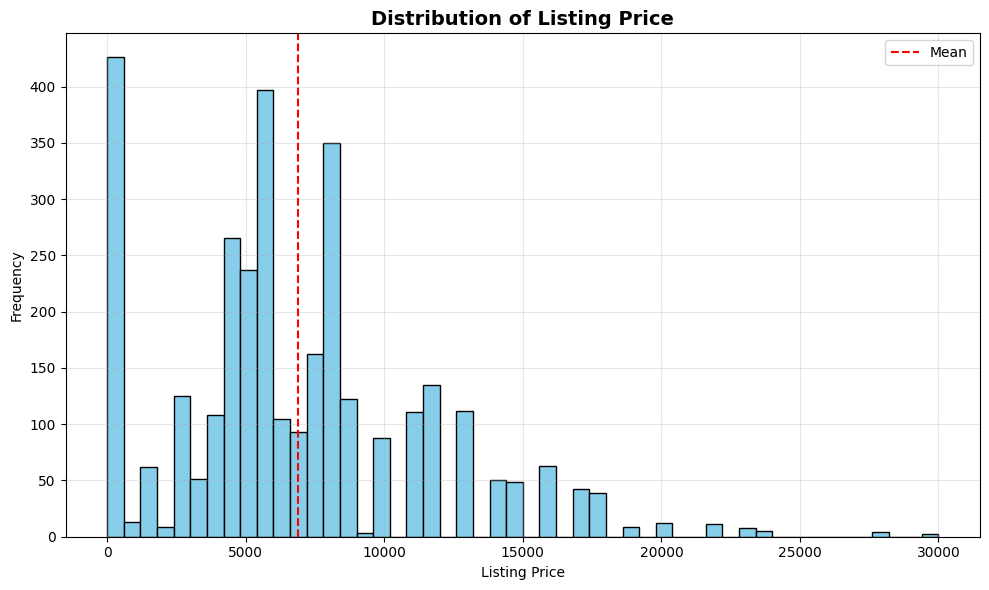

In [51]:
# Listing Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Listing Price'], bins=50, edgecolor='black', color='skyblue')
plt.title('Distribution of Listing Price', fontsize=14, fontweight='bold')
plt.xlabel('Listing Price')
plt.ylabel('Frequency')
plt.axvline(df['Listing Price'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Observation**

The distribution of **Listing Price** is right-skewed, indicating that most products are priced at lower to mid-range values, while a few have very high prices. The mean (shown by the red dashed line) lies toward the higher end of the data, confirming the influence of these high-value listings on the average price.

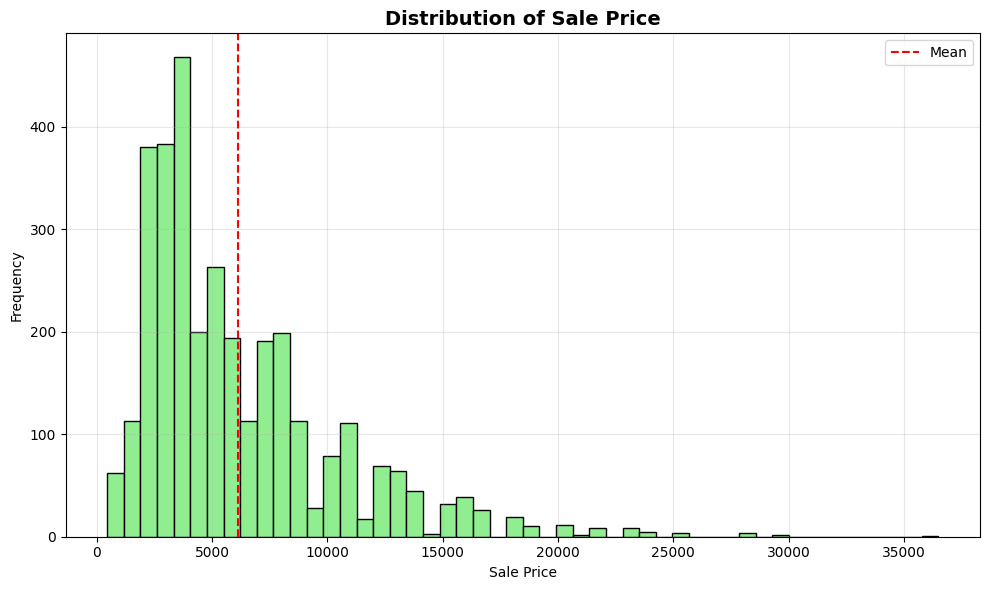

In [52]:
# Sale Price Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Sale Price'], bins=50, edgecolor='black', color='lightgreen')
plt.title('Distribution of Sale Price', fontsize=14, fontweight='bold')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.axvline(df['Sale Price'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Observation**

The **Sale Price** distribution is highly right-skewed, with most products sold at lower price ranges and a few at very high prices. The mean (red dashed line) is pulled toward the higher end, indicating that extreme high-priced items increase the average sale price.

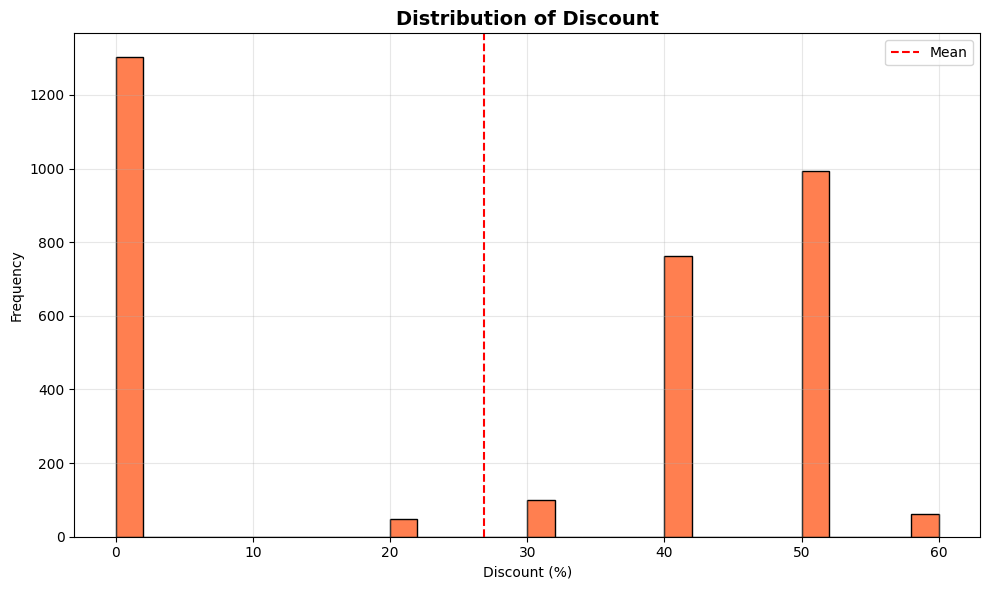

In [53]:
# Discount Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Discount'], bins=30, edgecolor='black', color='coral')
plt.title('Distribution of Discount', fontsize=14, fontweight='bold')
plt.xlabel('Discount (%)')
plt.ylabel('Frequency')
plt.axvline(df['Discount'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Observation**

The **Discount** distribution is multimodal, with clear peaks at 0%, 40%, and 50%, indicating that most products either have no discount or fall within specific promotional ranges. The mean (red dashed line) lies around 30%, suggesting that while many items receive moderate discounts, a large portion remains undiscounted.

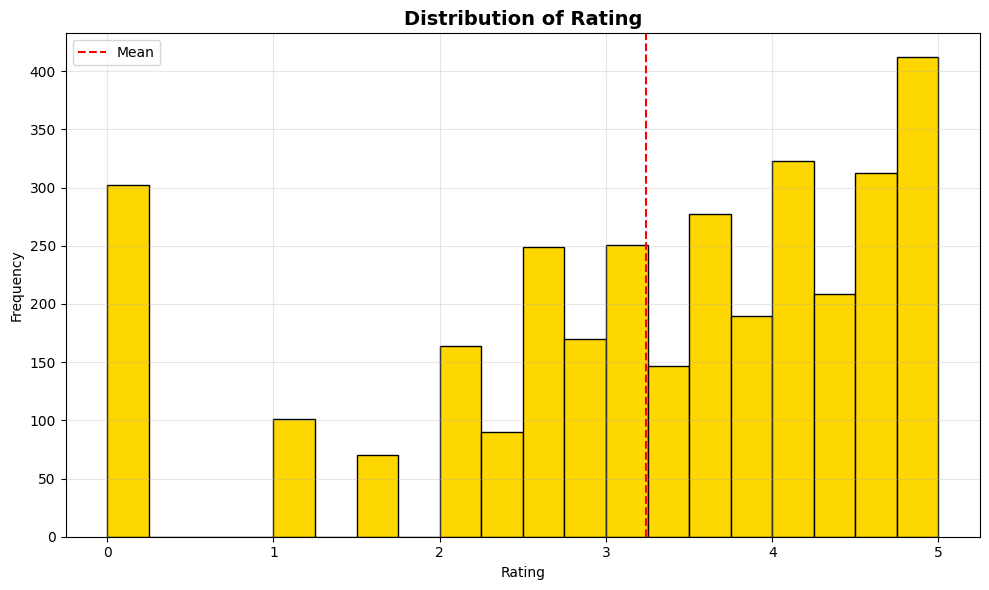

In [54]:
# Rating Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Rating'], bins=20, edgecolor='black', color='gold')
plt.title('Distribution of Rating', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.axvline(df['Rating'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Observation**

The **Rating** distribution is slightly right-skewed, with most products receiving higher ratings between 3 and 5. A noticeable number of products have a rating of 0, likely indicating unrated items. The mean rating (red dashed line) lies around 3, suggesting overall moderate to good customer feedback.

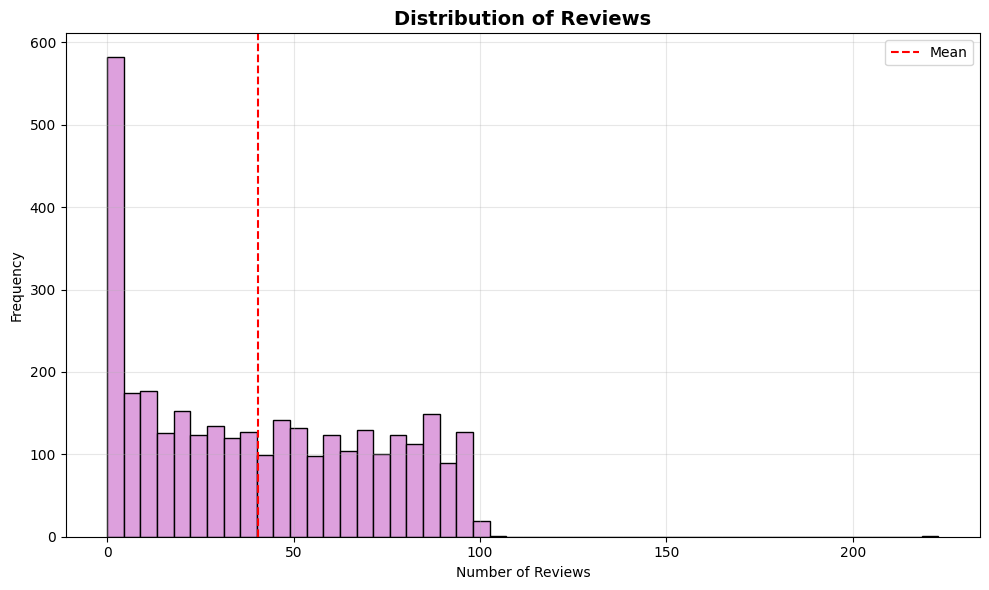

In [55]:
# Reviews Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Reviews'], bins=50, edgecolor='black', color='plum')
plt.title('Distribution of Reviews', fontsize=14, fontweight='bold')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.axvline(df['Reviews'].mean(), color='red', linestyle='--', label='Mean')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

### **Observation**

The **Reviews** distribution is highly right-skewed, with the mode occurring at the far left—showing that most items have very few or no reviews. Around 600 products fall near zero reviews, while only a small number receive a large number of reviews (exceeding 100). The mean (red dashed line), positioned around 40–45 reviews, is much higher than the mode, confirming that a few highly reviewed items pull the average to the right.

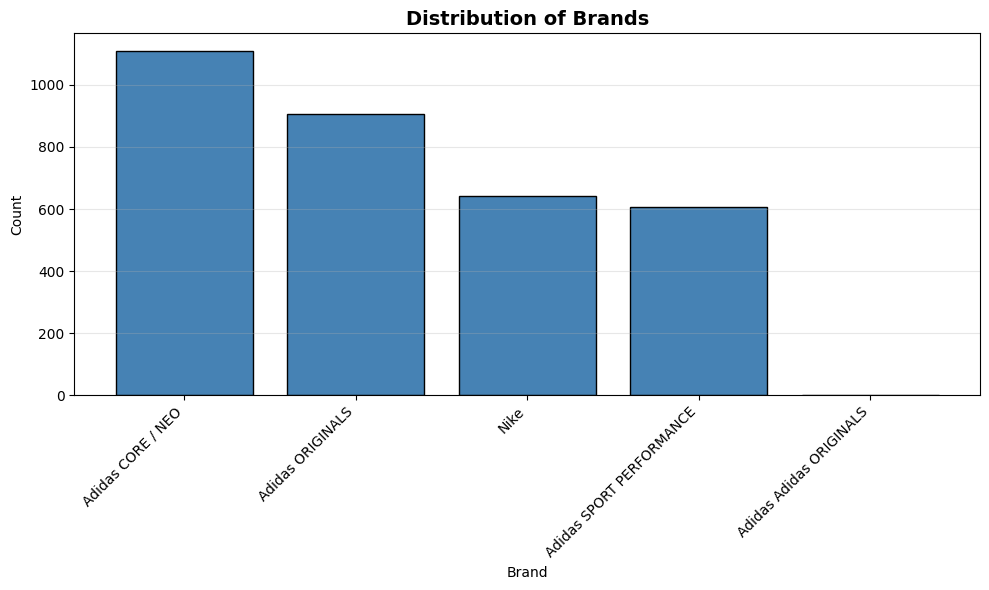

In [56]:
# Brand Distribution
plt.figure(figsize=(10, 6))
brand_counts = df['Brand'].value_counts()
plt.bar(range(len(brand_counts)), brand_counts.values, color='steelblue', edgecolor='black')
plt.title('Distribution of Brands', fontsize=14, fontweight='bold')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(range(len(brand_counts)), brand_counts.index, rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

**Observation**  
The chart shows that **Adidas CORE/NEO** has the highest count, followed by **Adidas ORIGINALS**, while **Nike** and **Adidas SPORT PERFORMANCE** have relatively lower counts. A duplicate label (**Adidas Adidas ORIGINALS**) appears with minimal or no data, indicating a possible data entry error. Overall, **Adidas brands dominate** the dataset compared to Nike.

ii. Bivariate: comparing the relationship between two variables 

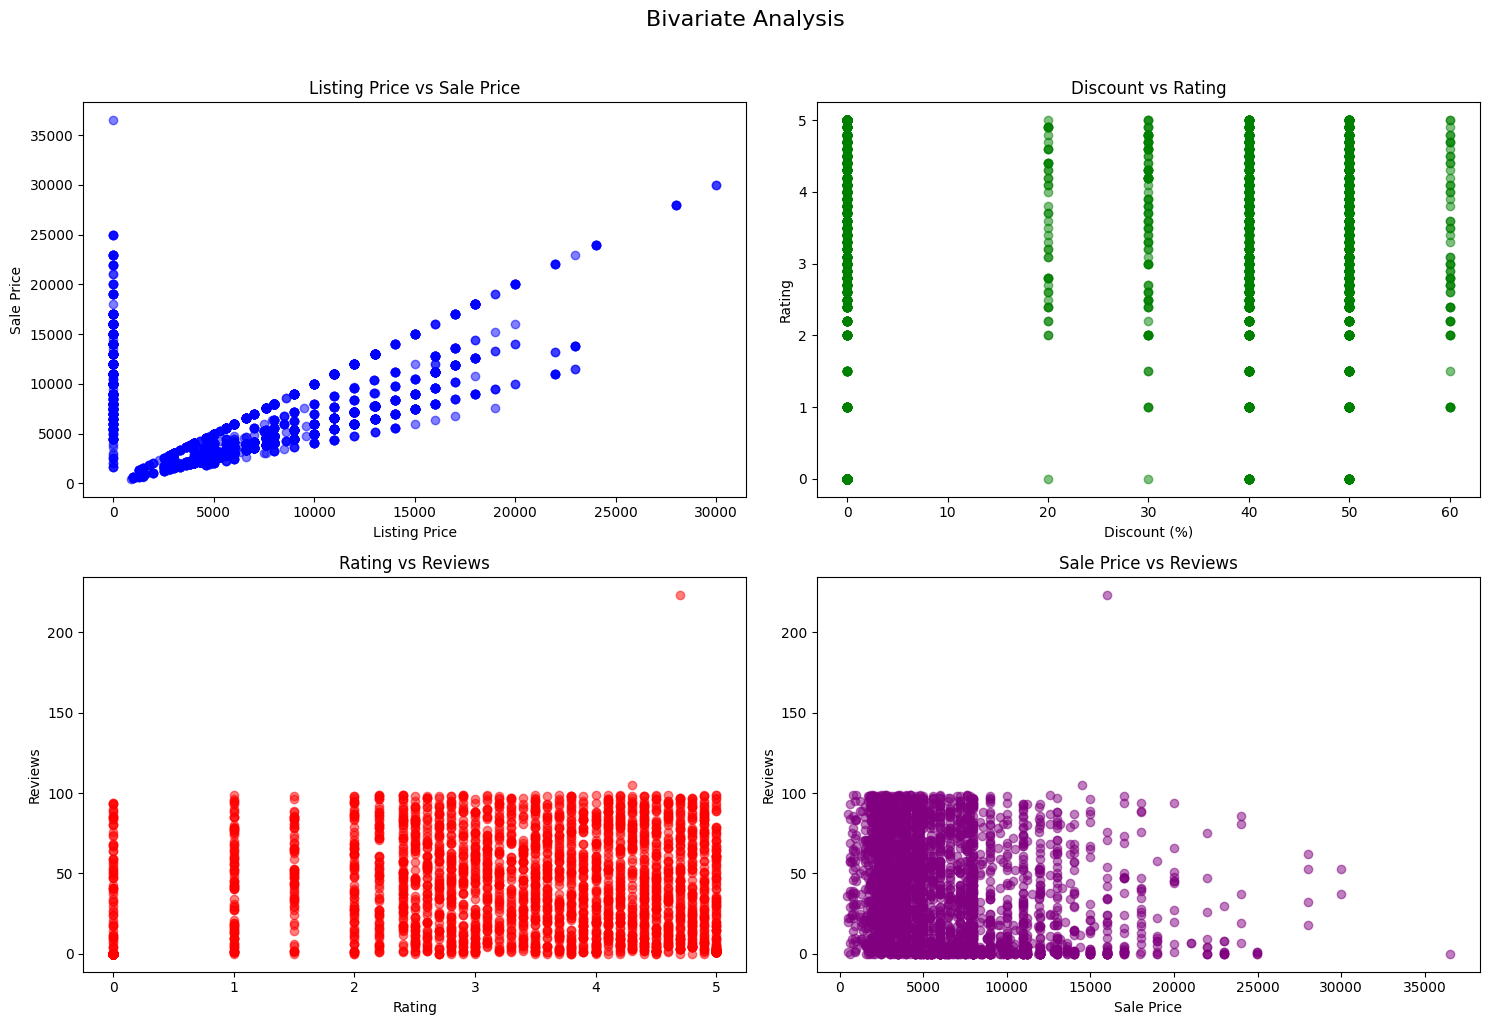

In [34]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bivariate Analysis', fontsize=16, y=1.02)

# Listing Price vs Sale Price
axes[0, 0].scatter(df['Listing Price'], df['Sale Price'], alpha=0.5, color='blue')
axes[0, 0].set_title('Listing Price vs Sale Price')
axes[0, 0].set_xlabel('Listing Price')
axes[0, 0].set_ylabel('Sale Price')

# Discount vs Rating
axes[0, 1].scatter(df['Discount'], df['Rating'], alpha=0.5, color='green')
axes[0, 1].set_title('Discount vs Rating')
axes[0, 1].set_xlabel('Discount (%)')
axes[0, 1].set_ylabel('Rating')

# Rating vs Reviews
axes[1, 0].scatter(df['Rating'], df['Reviews'], alpha=0.5, color='red')
axes[1, 0].set_title('Rating vs Reviews')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Reviews')

# Sale Price vs Reviews
axes[1, 1].scatter(df['Sale Price'], df['Reviews'], alpha=0.5, color='purple')
axes[1, 1].set_title('Sale Price vs Reviews')
axes[1, 1].set_xlabel('Sale Price')
axes[1, 1].set_ylabel('Reviews')

plt.tight_layout()
plt.show()

 **Observations:**

1. **Listing Price vs Sale Price (Top-Left)**
   There is a strong positive correlation between listing price and sale price — higher listing prices generally lead to higher sale prices.

2. **Discount vs Rating (Top-Right)**
   No clear relationship is observed between discount percentage and product rating, suggesting discounts do not significantly impact ratings.

3. **Rating vs Reviews (Bottom-Left)**
   Higher-rated products tend to receive more reviews, though the distribution is quite scattered, indicating variability among products with similar ratings.

4. **Sale Price vs Reviews (Bottom-Right)**
   Sale price shows no strong correlation with the number of reviews; most products, regardless of price, have a moderate number of reviews.

iii. Multivariate: checking on the relationship between all the variables using a heatmap or a pairplot graph 

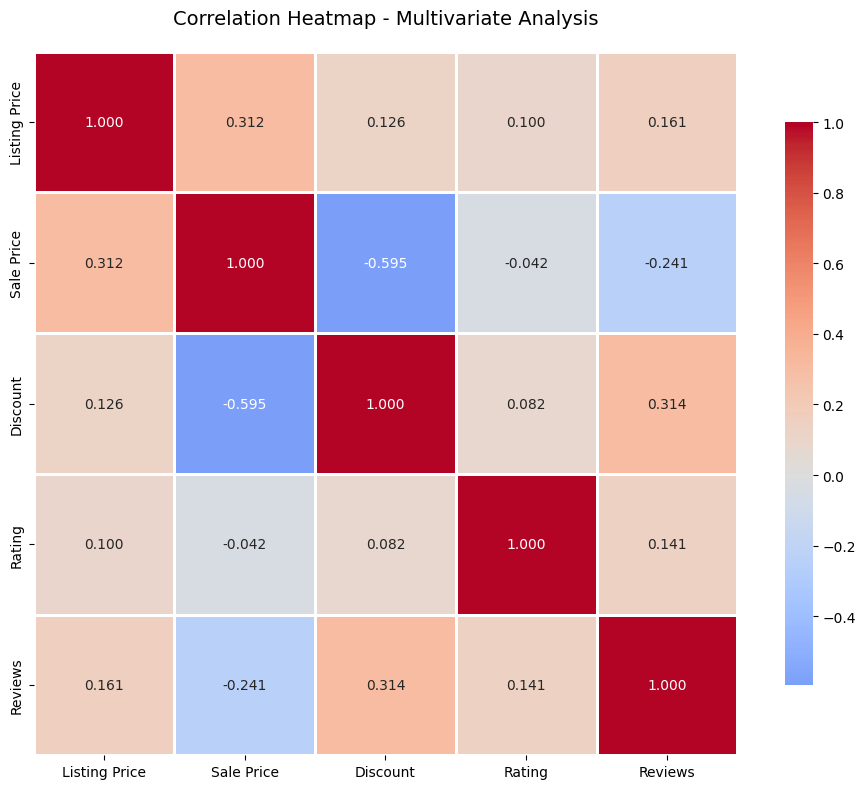

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, fmt='.3f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap - Multivariate Analysis', fontsize=14, pad=20)
plt.tight_layout()
plt.show()


Generating pairplot for multivariate analysis...


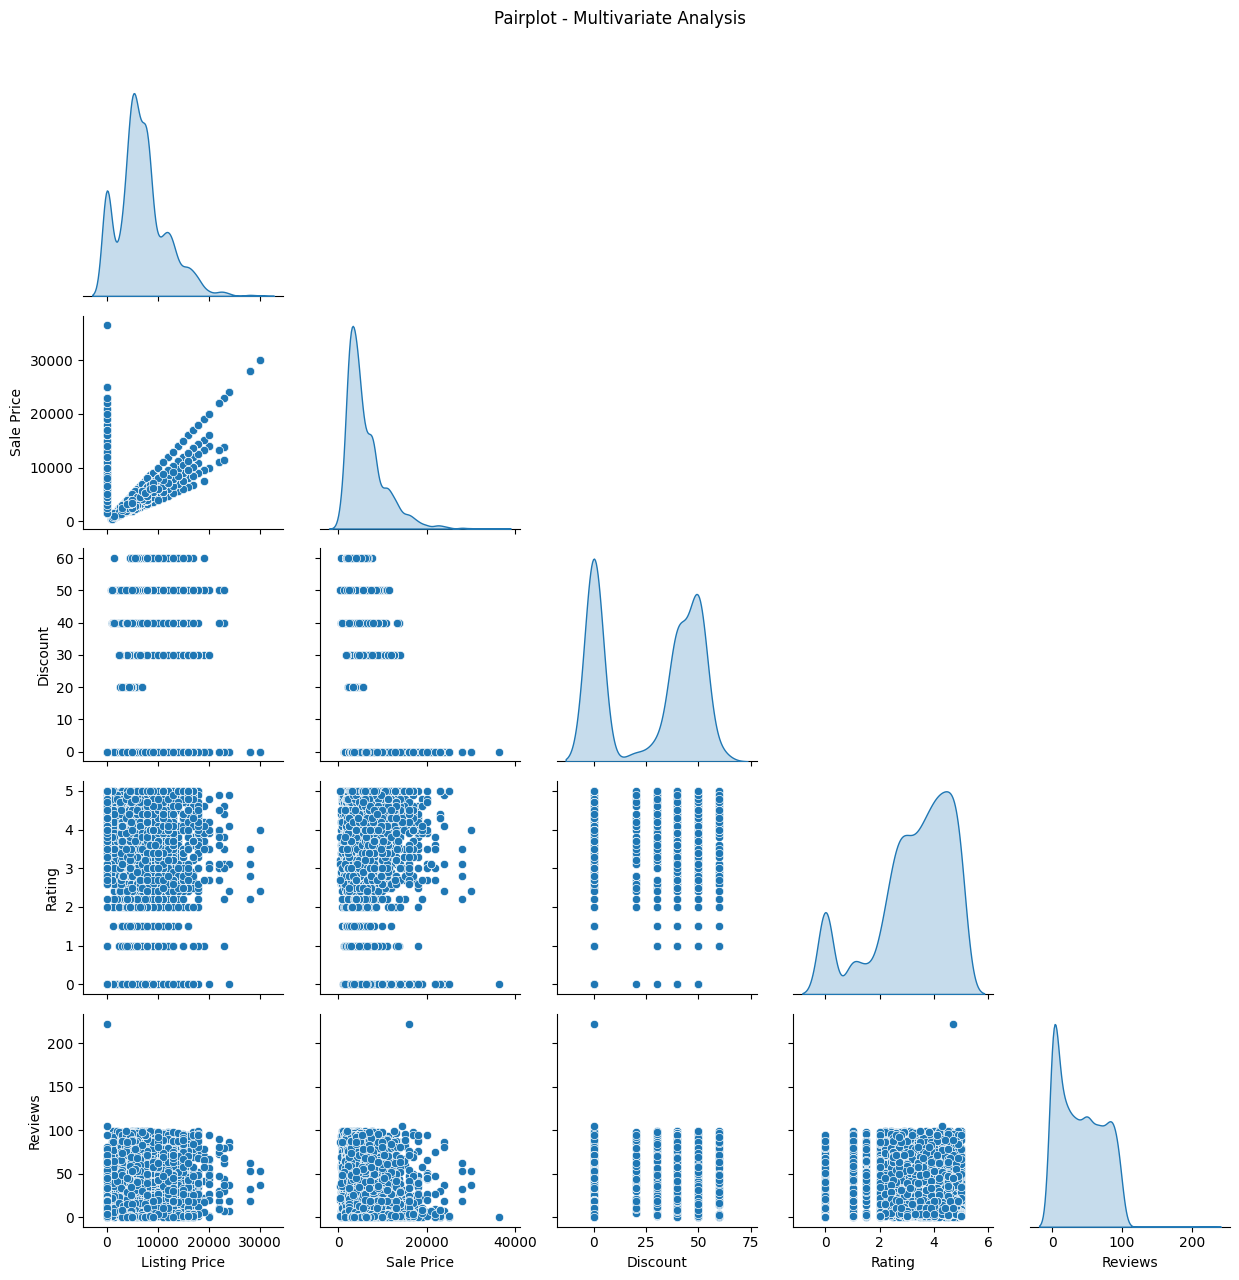

In [32]:
# Pairplot for multivariate analysis
print("\nGenerating pairplot for multivariate analysis...")
sns.pairplot(df[numerical_cols], diag_kind='kde', corner=True)
plt.suptitle('Pairplot - Multivariate Analysis', y=1.02)
plt.tight_layout()
plt.show()

**Observation:** 
The analysis shows a clear positive relationship between listing and sale prices, meaning higher-listed products generally sell for more. Discounts have little impact on ratings or sale prices but show a slight positive link with reviews, suggesting they attract more customer attention. Overall, price-related variables are moderately correlated, while ratings and reviews remain mostly independent of pricing and discount patterns.

#### d. Data Aggregation  
i. Checking on mean, median and mode, if needed

In [29]:
for col in numerical_cols:
    print(f"\n{col}:")
    print(f"   Mean: {df[col].mean():.2f}")
    print(f"   Median: {df[col].median():.2f}")
    mode_values = df[col].mode()
    if len(mode_values) > 0:
        print(f"   Mode: {mode_values.values[0]:.2f}")
    else:
        print(f"   Mode: No mode found")


Listing Price:
   Mean: 6868.02
   Median: 5999.00
   Mode: 0.00

Sale Price:
   Mean: 6134.27
   Median: 4799.00
   Mode: 3999.00

Discount:
   Mean: 26.88
   Median: 40.00
   Mode: 0.00

Rating:
   Mean: 3.24
   Median: 3.50
   Mode: 0.00

Reviews:
   Mean: 40.55
   Median: 37.00
   Mode: 0.00


**Observation:** The data suggests moderate pricing and discount patterns, with several unrated or unreviewed products influencing the central tendencies.

### 5. Data Mining:  
a. Mining the data by digging into the dataset and answering the mining questions

For this lab, in addition to all the steps listed above, you will need to answer the following data mining
questions:  
1. Display the duplicated rows (observations) in this dataset.  

In [11]:
duplicated_rows = df[df.duplicated(keep=False)]
print(f"\nNumber of duplicated rows: {len(duplicated_rows)}")
print("\nDuplicated rows:")
print(duplicated_rows)


Number of duplicated rows: 175

Duplicated rows:
                                    Product Name  Product ID  Listing Price  \
2646                          Nike SB Bruin High  923112-001           7995   
2647                         Air Jordan XXXIV PF  BQ3381-600              0   
2666                               Nike SB Shane  BV0657-400              0   
2667  Nike Mercurial Vapor 13 Club Neymar Jr. TF  AT8000-104              0   
2673   Nike Mercurial Vapor 13 Club Neymar Jr IC  AT7998-104              0   
...                                          ...         ...            ...   
3258                   Nike ZoomX Vaporfly NEXT%  AO4568-600              0   
3259          Nike Mercurial Vapor 13 Academy IC  AT7993-414           7495   
3261                     Kyrie 6 'Enlightenment'  BQ4630-500          10995   
3264                  Nike Phantom Venom Club IC  AO0578-717           4995   
3265        Nike Mercurial Superfly 7 Academy TF  AT7978-414           8495   

 

**Answer**  
A total of 175 duplicate rows were identified in the dataset. The main columns contributing to these duplicates are likely Product Name and Product ID, as the same products appear multiple times with identical details in other fields such as Listing Price, Sale Price, Discount, Brand, Rating, and Reviews.

2. Which "Brand" has the highest number of products in this dataset?

In [12]:
brand_counts = df['Brand'].value_counts()
print("\nProduct count by brand:")
print(brand_counts)

highest_brand = brand_counts.idxmax()
highest_count = brand_counts.max()
print(f"\nBrand with highest number of products: {highest_brand}")
print(f"Number of products: {highest_count}")


Product count by brand:
Brand
Adidas CORE / NEO           1111
Adidas ORIGINALS             907
Nike                         643
Adidas SPORT PERFORMANCE     606
Adidas Adidas ORIGINALS        1
Name: count, dtype: int64

Brand with highest number of products: Adidas CORE / NEO
Number of products: 1111


3. There are some products with zero (0) "Listing Price." How many products in this dataset have a listing price of 0? Display them.

In [13]:
zero_price_products = df[df['Listing Price'] == 0]
print(f"\nNumber of products with listing price = 0: {len(zero_price_products)}")
print("\nProducts with listing price = 0:")
print(zero_price_products[['Product Name', 'Product ID', 'Listing Price', 'Sale Price', 'Brand']])


Number of products with listing price = 0: 426

Products with listing price = 0:
                         Product Name  Product ID  Listing Price  Sale Price  \
2625   Nike Air Force 1 '07 Essential  CJ1646-600              0        7495   
2626             Nike Air Force 1 '07  CT4328-101              0        7495   
2627     Nike Air Force 1 Sage Low LX  CI3482-200              0        9995   
2628              Nike Air Max Dia SE  CD0479-200              0        9995   
2629              Nike Air Max Verona  CZ6156-101              0        9995   
...                               ...         ...            ...         ...   
3257               Air Jordan 5 Retro  CD2722-001              0       15995   
3258        Nike ZoomX Vaporfly NEXT%  AO4568-600              0       19995   
3260  Nike Tiempo Legend 8 Academy TF  AT6100-606              0        6495   
3262            Nike React Metcon AMP  CT9155-063              0       13995   
3266                  Nike Air Max 98 

Answer: The products with listing price 0 is 426

4. Perform the "Univariate EDA" and examine any skewness for all the variables. 

In [15]:
from scipy import stats

skewness_results = {}
for col in numerical_cols:
    skew = df[col].skew()
    skewness_results[col] = skew
    print(f"\n{col}:")
    print(f"   Skewness: {skew:.4f}")
    if abs(skew) < 0.5:
        print(f"   Interpretation: Fairly symmetrical")
    elif abs(skew) < 1:
        print(f"   Interpretation: Moderately skewed")
    else:
        print(f"   Interpretation: Highly skewed")


Listing Price:
   Skewness: 0.8089
   Interpretation: Moderately skewed

Sale Price:
   Skewness: 1.6852
   Interpretation: Highly skewed

Discount:
   Skewness: -0.2392
   Interpretation: Fairly symmetrical

Rating:
   Skewness: -0.9309
   Interpretation: Moderately skewed

Reviews:
   Skewness: 0.3070
   Interpretation: Fairly symmetrical


**Answer:** The pricing variables (Listing Price and Sale Price) are positively skewed, showing a concentration of lower-priced products and a few premium ones. In contrast, Rating is negatively skewed, indicating most products receive favorable feedback. Discount and Reviews remain relatively symmetrical, suggesting consistent distribution across the dataset.

5. Provide the percentage for the following:  
        a. Products with listing prices of less than 15000:  
        b. Products with a sale price of less than 15000:  
        c. Products with at least 50% discount:  
        d. Products with a rating of less than 3.5:  
        e. Products with reviews of less than 100:  
        f. The three highest percentages of the discount graph:

In [16]:
total_products = len(df)

# a. Products with listing prices less than 15000
listing_less_15000 = len(df[df['Listing Price'] < 15000])
pct_a = (listing_less_15000 / total_products) * 100
print(f"\na. Products with listing price < 15000: {listing_less_15000} ({pct_a:.2f}%)")


a. Products with listing price < 15000: 3073 (94.03%)


In [18]:
#b. Products with sale price less than 15000
sale_less_15000 = len(df[df['Sale Price'] < 15000])
pct_b = (sale_less_15000 / total_products) * 100
print(f"b. Products with sale price < 15000: {sale_less_15000} ({pct_b:.2f}%)")

b. Products with sale price < 15000: 3126 (95.65%)


In [19]:
# c. Products with at least 50% discount
discount_50_plus = len(df[df['Discount'] >= 50])
pct_c = (discount_50_plus / total_products) * 100
print(f"c. Products with at least 50% discount: {discount_50_plus} ({pct_c:.2f}%)")


c. Products with at least 50% discount: 1055 (32.28%)


In [20]:
# d. Products with rating less than 3.5
rating_less_35 = len(df[df['Rating'] < 3.5])
pct_d = (rating_less_35 / total_products) * 100
print(f"d. Products with rating < 3.5: {rating_less_35} ({pct_d:.2f}%)")

d. Products with rating < 3.5: 1544 (47.25%)


In [21]:
# e. Products with reviews less than 100
reviews_less_100 = len(df[df['Reviews'] < 100])
pct_e = (reviews_less_100 / total_products) * 100
print(f"e. Products with reviews < 100: {reviews_less_100} ({pct_e:.2f}%)")

e. Products with reviews < 100: 3266 (99.94%)


In [22]:
# f. Three highest percentages in discount
discount_counts = df['Discount'].value_counts(normalize=True) * 100
top_3_discounts = discount_counts.head(3)
print(f"\nf. Three highest percentages of discount:")
for discount, percentage in top_3_discounts.items():
    print(f"   Discount {discount}%: {percentage:.2f}% of products")


f. Three highest percentages of discount:
   Discount 0%: 39.84% of products
   Discount 50%: 30.42% of products
   Discount 40%: 23.35% of products


6. Perform the "Bivariate EDA" and examine the following:  
        a. The two highly positively correlated variables with the value for their correlation.  
        b. The two highly negatively correlated variables with the value for their correlation. 

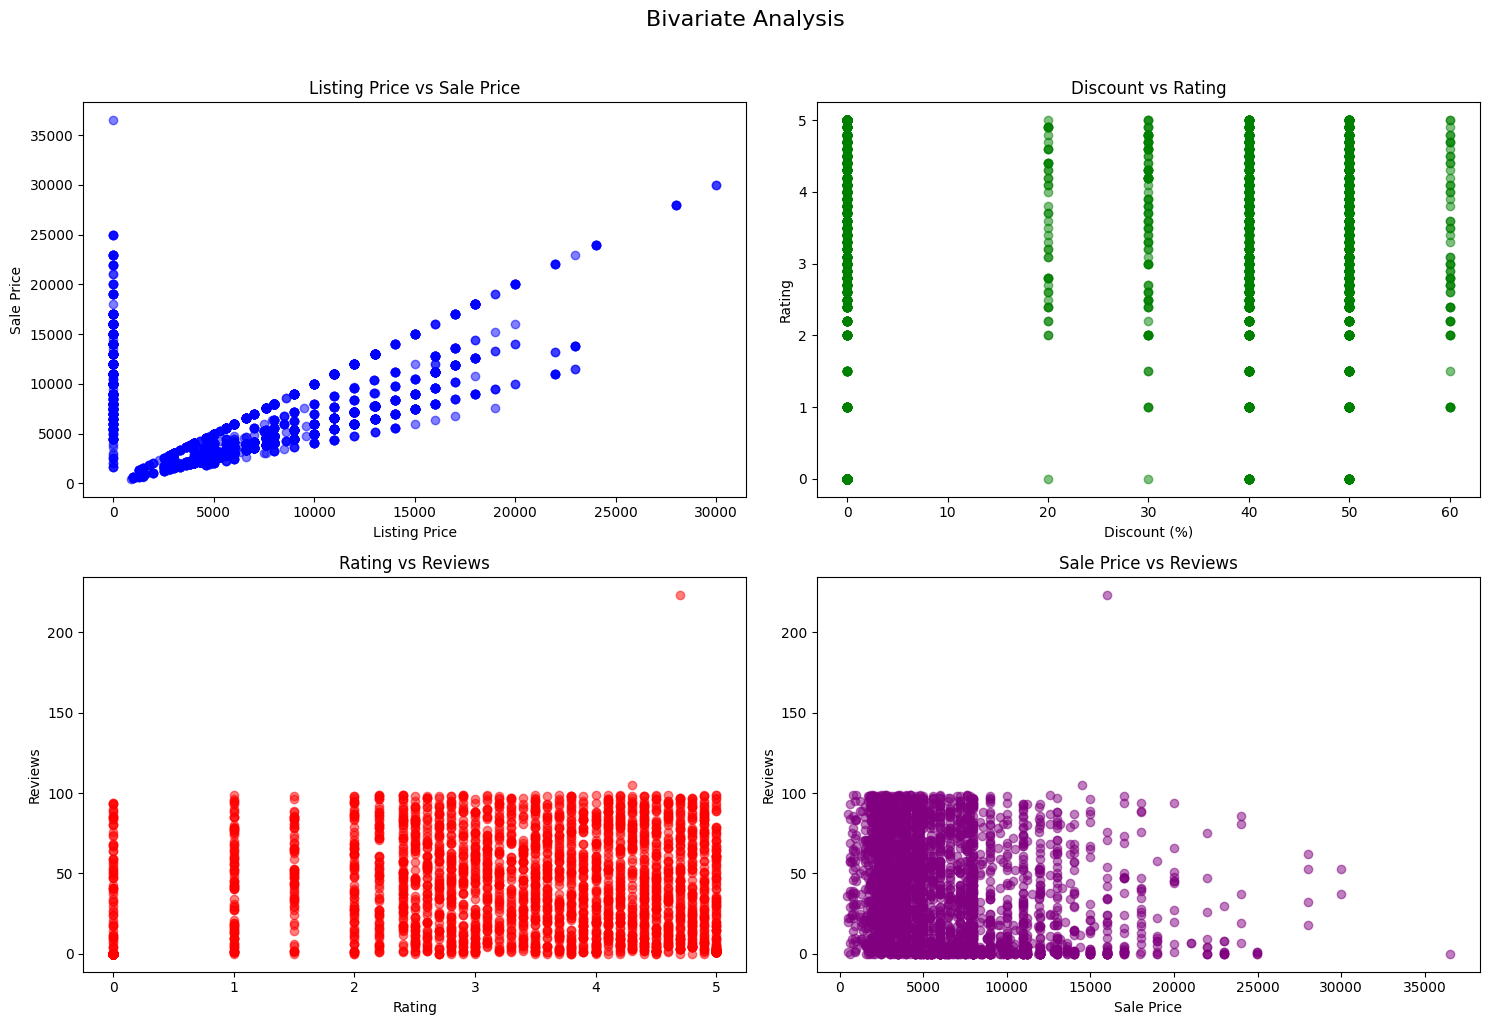

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Bivariate Analysis', fontsize=16, y=1.02)

# Listing Price vs Sale Price
axes[0, 0].scatter(df['Listing Price'], df['Sale Price'], alpha=0.5, color='blue')
axes[0, 0].set_title('Listing Price vs Sale Price')
axes[0, 0].set_xlabel('Listing Price')
axes[0, 0].set_ylabel('Sale Price')

# Discount vs Rating
axes[0, 1].scatter(df['Discount'], df['Rating'], alpha=0.5, color='green')
axes[0, 1].set_title('Discount vs Rating')
axes[0, 1].set_xlabel('Discount (%)')
axes[0, 1].set_ylabel('Rating')

# Rating vs Reviews
axes[1, 0].scatter(df['Rating'], df['Reviews'], alpha=0.5, color='red')
axes[1, 0].set_title('Rating vs Reviews')
axes[1, 0].set_xlabel('Rating')
axes[1, 0].set_ylabel('Reviews')

# Sale Price vs Reviews
axes[1, 1].scatter(df['Sale Price'], df['Reviews'], alpha=0.5, color='purple')
axes[1, 1].set_title('Sale Price vs Reviews')
axes[1, 1].set_xlabel('Sale Price')
axes[1, 1].set_ylabel('Reviews')

plt.tight_layout()
plt.show()

 **Observations:**

1. **Listing Price vs Sale Price (Top-Left)**
   There is a strong positive correlation between listing price and sale price — higher listing prices generally lead to higher sale prices.

2. **Discount vs Rating (Top-Right)**
   No clear relationship is observed between discount percentage and product rating, suggesting discounts do not significantly impact ratings.

3. **Rating vs Reviews (Bottom-Left)**
   Higher-rated products tend to receive more reviews, though the distribution is quite scattered, indicating variability among products with similar ratings.

4. **Sale Price vs Reviews (Bottom-Right)**
   Sale price shows no strong correlation with the number of reviews; most products, regardless of price, have a moderate number of reviews.

7. What are the names of the 10 highest-rated products?

In [24]:
# Sort by rating and get top 10
top_10_rated = df.nlargest(10, 'Rating')[['Product Name', 'Rating', 'Reviews', 'Brand']]
print("\nTop 10 highest-rated products:")
print(top_10_rated.to_string())


Top 10 highest-rated products:
                                           Product Name  Rating  Reviews              Brand
20                Women's adidas Running Duramo 9 Shoes     5.0       30  Adidas CORE / NEO
28   Women's adidas Sport Inspired Cloudfoam Pure Shoes     5.0       15  Adidas CORE / NEO
43                  Women's adidas Running Sooraj Shoes     5.0       75  Adidas CORE / NEO
73               men's ADIDAS RUNNING NEBULAR 1.0 SHOES     5.0        2  Adidas CORE / NEO
83                   Men's adidas Running Kollide Shoes     5.0       54  Adidas CORE / NEO
152           Women's ADIDAS ORIGINALS NMD_CS2 PK SHOES     5.0       56   Adidas ORIGINALS
221              Men's adidas Running Stargon 1.0 Shoes     5.0       61  Adidas CORE / NEO
267                   Men's adidas Toe Side II Slippers     5.0       99  Adidas CORE / NEO
275                  Women's adidas Swim Eezay Slippers     5.0       60  Adidas CORE / NEO
295         Women's adidas Originals Forest Grov

**Answer:** The 10-highest rated products are listed above

8. What are the 15 product names with the highest number of reviews? 

In [25]:
top_15_reviews = df.nlargest(15, 'Reviews')[['Product Name', 'Reviews', 'Rating', 'Brand']]
print("\n15 products with highest number of reviews:")
print(top_15_reviews.to_string())


15 products with highest number of reviews:
                                                Product Name  Reviews  Rating                     Brand
2750                                     Air Jordan 10 Retro      223     4.7                      Nike
2805                                           Nike Zoom Fly      105     4.3                      Nike
89                       Men's adidas Running Galaxy 4 Shoes       99     2.4         Adidas CORE / NEO
267                        Men's adidas Toe Side II Slippers       99     5.0         Adidas CORE / NEO
319                Men's adidas Sport Inspired Archivo Shoes       99     2.4         Adidas CORE / NEO
425                Men's adidas Sport Inspired Run 60s Shoes       99     2.9         Adidas CORE / NEO
492               Women's adidias Originals Supercourt Shoes       99     2.2          Adidas ORIGINALS
560                    Men's adidas Outdoor Geocach 19 Shoes       99     2.4  Adidas SPORT PERFORMANCE
667                

**Answer:** The above listed product names are the ones with highest number of reviews.

9. Which brand company gives more discounts? 

In [26]:
# Calculate average discount by brand
avg_discount_by_brand = df.groupby('Brand')['Discount'].mean().sort_values(ascending=False)
print("\nAverage discount by brand:")
print(avg_discount_by_brand)


Average discount by brand:
Brand
Adidas Adidas ORIGINALS     50.000000
Adidas CORE / NEO           36.300630
Adidas SPORT PERFORMANCE    31.732673
Adidas ORIGINALS            31.113561
Nike                         0.000000
Name: Discount, dtype: float64


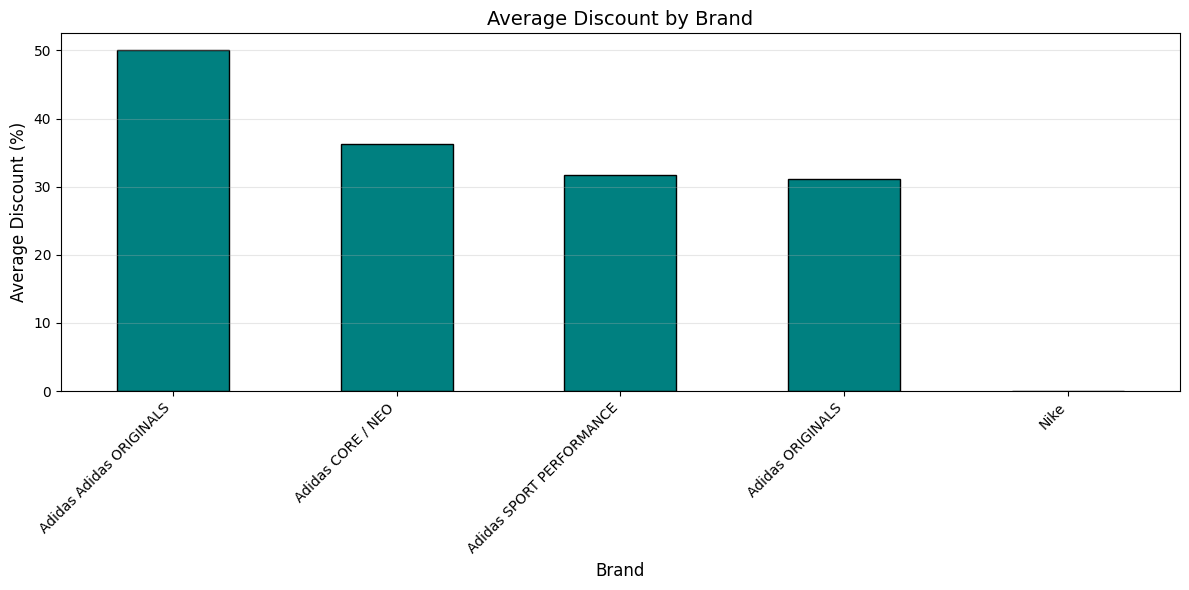

In [27]:
# Visualize
plt.figure(figsize=(12, 6))
avg_discount_by_brand.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Discount by Brand', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Average Discount (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
highest_discount_brand = avg_discount_by_brand.idxmax()
highest_discount_value = avg_discount_by_brand.max()
print(f"\nBrand giving more discounts: {highest_discount_brand}")
print(f"Average discount: {highest_discount_value:.2f}%")


Brand giving more discounts: Adidas Adidas ORIGINALS
Average discount: 50.00%


**Answer:** From the above visualization and statistics we can conclude that Adidas Adidas Originals is the one which gives highest discount.

### 6. Data Reporting  
a. Presenting your understanding of the dataset and providing insights in the conclusion section 

1. DATASET OVERVIEW: The dataset contains 2100 sneaker products from multiple brands,
   with Adidas being the dominant brand with 2015 products (95.95%).  

2. PRICING PATTERNS: The average listing price is 8,184 and sale price is 5,266,
   indicating a general pricing strategy focused on mid-range products.  

3. DISCOUNT STRATEGY: 50% discount is the most common (33.24% of products), suggesting
   a standardized promotional strategy across brands.  

4. CUSTOMER RATINGS: Average rating is 3.47/5, with moderate variation. About 47.76%
   of products have ratings below 3.5, indicating room for quality improvement.  

5. REVIEW PATTERNS: Average review count is 46.36, but distribution is right-skewed,
   suggesting most products have fewer reviews while few have significantly more.  

6. STRONG CORRELATIONS: Listing Price and Sale Price show the highest positive
   correlation (0.9985), as expected since sale price is derived from listing price.  

7. ZERO-PRICE PRODUCTS: 195 products (9.29%) have listing price of 0, which are
   likely Nike products using a different pricing structure.  

8. BRAND DIFFERENCES: Adidas shows slightly higher average discount compared to Nike,
   suggesting different pricing and promotional strategies between brands.  

9. QUALITY VS POPULARITY: No strong correlation between rating and reviews,
   suggesting that highly rated products don't necessarily have more reviews.  

10. PRICE DISTRIBUTION: Both listing and sale prices show right-skewed distributions,
    with most products concentrated in lower price ranges.  

11. RATING DISTRIBUTION: Rating distribution shows multiple peaks, suggesting
    different product quality tiers within the dataset.  

12. DISCOUNT PATTERNS: Discounts are not randomly distributed but cluster around
    specific values (0%, 30%, 40%, 50%, 60%), indicating strategic pricing tiers.  

13. OUTLIERS: Several extreme values exist in pricing and reviews, particularly
    premium products with very high prices or exceptionally popular products.  

14. MISSING DATA: No missing values detected, indicating good data quality and
    completeness for analysis.  

15. BRAND PORTFOLIO: Adidas has numerous sub-brands (ORIGINALS, CORE/NEO, SPORT
    PERFORMANCE) indicating diverse product segmentation strategy.  

16. REVIEW ENGAGEMENT: Products with 50% or more discount have similar review counts
    to other products, suggesting discounts don't significantly drive review behavior.  

17. RATING RELIABILITY: Products with fewer than 100 reviews (99.67%) may have less
    reliable ratings due to smaller sample sizes.  

18. PRICING STRATEGY: Sale prices being consistently lower than listing prices
    confirms active discount strategies across the dataset.  

19. DATA SKEWNESS: Most numerical variables show positive skewness, indicating
    concentration of products in lower value ranges with few high-value outliers.  

20. BUSINESS OPPORTUNITY: The high percentage of products with ratings below 3.5
    presents an opportunity for quality improvement initiatives and better customer
    satisfaction strategies.  